## FILE READING

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = r"D:\ML\train.csv"

In [4]:
df = pd.read_csv(path)

## Basic Data Quality Checks

In [5]:
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [6]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [7]:
df.columns =['id', 'Product ID', 'Type', 'Air temperature ',
       'Process temperature ', 'Rotational speed ', 'Torque ',
       'Tool wear ', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    136429 non-null  int64  
 1   Product ID            136429 non-null  object 
 2   Type                  136429 non-null  object 
 3   Air temperature       136429 non-null  float64
 4   Process temperature   136429 non-null  float64
 5   Rotational speed      136429 non-null  int64  
 6   Torque                136429 non-null  float64
 7   Tool wear             136429 non-null  int64  
 8   Machine failure       136429 non-null  int64  
 9   TWF                   136429 non-null  int64  
 10  HDF                   136429 non-null  int64  
 11  PWF                   136429 non-null  int64  
 12  OSF                   136429 non-null  int64  
 13  RNF                   136429 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 14.

In [9]:
df.isnull().sum()

id                      0
Product ID              0
Type                    0
Air temperature         0
Process temperature     0
Rotational speed        0
Torque                  0
Tool wear               0
Machine failure         0
TWF                     0
HDF                     0
PWF                     0
OSF                     0
RNF                     0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

## SEPRATION OF X & Y

In [11]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature ', 'Process temperature ',
       'Rotational speed ', 'Torque ', 'Tool wear ', 'Machine failure', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [12]:
x = df.drop(['id', 'Product ID' , 'Machine failure'] , axis = 1)
y = df['Machine failure']

In [13]:
x.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Machine failure, dtype: int64

## CATEGORICAL & NUMERICAL DATA SEPERATION

In [15]:
cat = x.columns[x.dtypes == 'object']
num = x.columns[x.dtypes != 'object']

In [16]:
print(cat)
print("----------------")
print(num)

Index(['Type'], dtype='object')
----------------
Index(['Air temperature ', 'Process temperature ', 'Rotational speed ',
       'Torque ', 'Tool wear ', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')


In [17]:
x['Type'].isnull().sum()

np.int64(0)

## CREATE PIPELINE

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [19]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),   
    ('scaler', StandardScaler())                        
])


cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent' )),
    ('encoder', OrdinalEncoder())      
])

In [20]:
## Combine all Pipelines
pre =  ColumnTransformer([ ('num' ,  num_pipeline , num  ) ,
                    ('cat' , cat_pipeline , cat) ])

In [21]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


## APPLY TO DATA

In [22]:
x_scaled = pre.fit_transform(x)

In [23]:
x_scaled

array([[ 0.3958803 , -0.24623038,  0.54541592, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ..., -0.06303833,
        -0.04756777,  2.        ],
       [-0.30220363, -1.04035788,  2.05187289, ..., -0.06303833,
        -0.04756777,  1.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ..., -0.06303833,
        -0.04756777,  1.        ],
       [-1.59097397, -1.32913151,  0.26430672, ..., -0.06303833,
        -0.04756777,  1.        ]], shape=(136429, 11))

In [24]:
x_scaled = pd.DataFrame(x_scaled , columns = x.columns)

In [25]:
x_scaled.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0



## FEATURE SELECTION METHOD

In [26]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(x_scaled , y , n_jobs = -1)

In [27]:
mi

array([0.00546298, 0.00189589, 0.0191423 , 0.01959388, 0.00706209,
       0.00720136, 0.02462637, 0.01109077, 0.01920947, 0.00101553,
       0.01124365])

In [28]:
mi = pd.Series(mi)

In [29]:
mi.index = x_scaled.columns

In [30]:
mi =  mi.sort_values()

In [31]:
mi

OSF                     0.001016
Air temperature         0.001896
Type                    0.005463
Torque                  0.007062
Tool wear               0.007201
HDF                     0.011091
RNF                     0.011244
Process temperature     0.019142
PWF                     0.019209
Rotational speed        0.019594
TWF                     0.024626
dtype: float64

<Axes: >

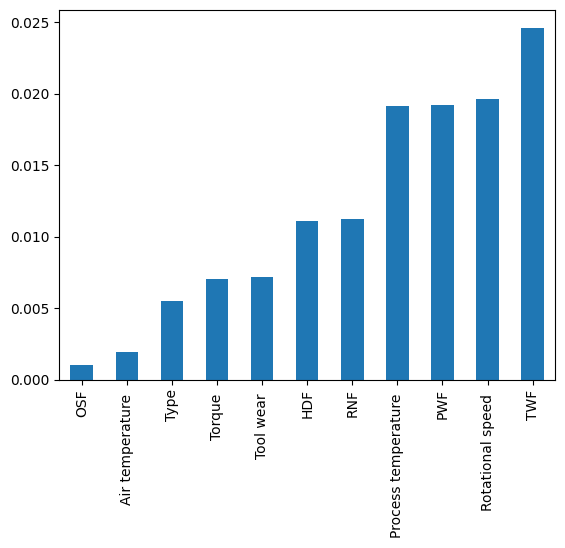

In [32]:
mi.plot(kind = 'bar')

In [33]:
len(mi)

11

In [34]:
len(x_scaled.columns)

11

## TRAIN TEST SPLIT

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train ,  x_test  ,  y_train ,  y_test  =  train_test_split(x_scaled  ,  y ,  test_size  =  0.2  ,  random_state  =  3)

In [37]:

print(x_train.shape , y_train.shape)
print(x_test.shape  ,  y_test.shape)

(109143, 11) (109143,)
(27286, 11) (27286,)


In [38]:
y_train.value_counts()

Machine failure
0    107418
1      1725
Name: count, dtype: int64

In [39]:
y_test.value_counts()

Machine failure
0    26863
1      423
Name: count, dtype: int64

In [40]:
y.value_counts()

Machine failure
0    134281
1      2148
Name: count, dtype: int64

## Model Fitting

In [41]:
from sklearn.linear_model  import LogisticRegression  
from sklearn.tree  import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier  ,  GradientBoostingClassifier
import xgboost  as xgb
from xgboost  import XGBClassifier
from sklearn.svm import SVC 
from sklearn.neighbors  import KNeighborsClassifier

## Loistic regression model fitting

In [42]:

logreg  =  LogisticRegression()
logreg.fit(x_train  ,  y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [43]:
logreg.score(x_train  ,  y_train)

0.9961701620809397

In [44]:
logreg.score(x_test  ,  y_test)

0.9962251704170637

In [45]:
train_pred  =  logreg.predict(x_train)
test_pred  =  logreg.predict(x_test)

In [46]:
from sklearn.metrics  import classification_report  ,  f1_score  , confusion_matrix

In [47]:
print(classification_report(y_train , train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    107418
           1       0.99      0.76      0.86      1725

    accuracy                           1.00    109143
   macro avg       0.99      0.88      0.93    109143
weighted avg       1.00      1.00      1.00    109143



In [48]:

print(classification_report(y_test , test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26863
           1       0.99      0.76      0.86       423

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



In [49]:
f1_score(y_train, train_pred)

0.8631303208906352

In [50]:
f1_score(y_test  ,  test_pred)

0.8624833110814419

In [51]:
cf = confusion_matrix(y_train , train_pred)
cf

array([[107407,     11],
       [   407,   1318]])

In [52]:
logreg.classes_

array([0, 1])

<Axes: >

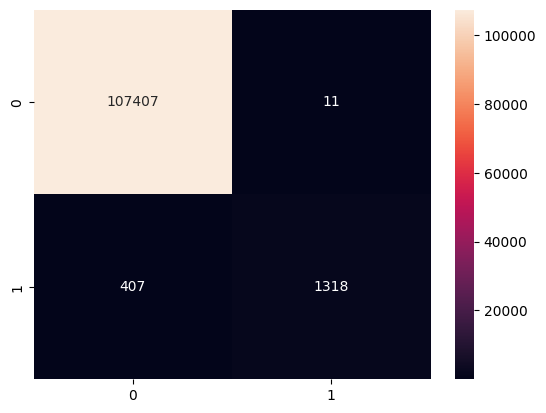

In [53]:
sns.heatmap(cf , annot = True , fmt='d' , xticklabels= True,
            yticklabels= True  )

In [54]:
from sklearn.model_selection import cross_val_score

In [ ]:
def  Evaluation( x_train  , y_train  , x_test  ,  y_test):
 
  data  =  {'LR'  :  LogisticRegression(),
          "DT" : DecisionTreeClassifier(max_depth  =  5 ,  min_samples_split=10 ),
          "RF" : RandomForestClassifier(max_depth  =  5 ,  min_samples_split=10 ) ,
          "GB" : GradientBoostingClassifier( ) ,
          'XGB' : XGBClassifier() ,
          "KNN" : KNeighborsClassifier(n_neighbors= 7) ,
          "SVM" : SVC()}
  for  name  ,  model in  data.items():
    model.fit(x_train ,  y_train  )
    train_pred  =  model.predict(x_train)
    test_pred  =  model.predict(x_test)
    f1_tr  =  f1_score(y_train  ,  train_pred)
    f1_ts  =  f1_score(y_test  ,  test_pred)
    cv  = cross_val_score( estimator  =  model , X  =  x_train  ,  y  = y_train  ,  cv  =  5  ,  n_jobs= -1)
    CR_tr  =  classification_report(y_train  , train_pred  , )
    cf_tr  =  confusion_matrix(y_train  ,  train_pred)
    CR_test  =  classification_report(y_test  ,  test_pred)
    cf_test  =  confusion_matrix(y_test  , test_pred)
 
    print(f"{name}")
    print(f"Train f1  --> {f1_tr}")
    print(f"Test f1  -- > {f1_ts}")
    print(f"Cv  -->  {cv}")
    print(cv.mean())
    print(f'CR_train -->  {CR_tr}' )
    sns.heatmap(cf_tr , annot  = True  , fmt =  'd' , xticklabels= True  ,  yticklabels= True  )
   
    print(f"CR_test  --> {CR_test}")
    sns.heatmap(cf_test , annot  = True  , fmt =  'd' , xticklabels= True  ,  yticklabels= True  )
    
    print()
    print('-------------------------------------------------')
    print()

- cv always work on training data

LR
Train f1  --> 0.8631303208906352
Test f1  -- > 0.8624833110814419
Cv  -->  [0.99647258 0.99633515 0.99615191 0.99551035 0.99633498]
0.996160995422019
CR_train -->                precision    recall  f1-score   support

           0       1.00      1.00      1.00    107418
           1       0.99      0.76      0.86      1725

    accuracy                           1.00    109143
   macro avg       0.99      0.88      0.93    109143
weighted avg       1.00      1.00      1.00    109143

CR_test  -->               precision    recall  f1-score   support

           0       1.00      1.00      1.00     26863
           1       0.99      0.76      0.86       423

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286


-------------------------------------------------

DT
Train f1  --> 0.8639790232710587
Test f1  -- > 0.8594377510040161
Cv  -->  [0.99647258 0.99628934 0.99615191 0.

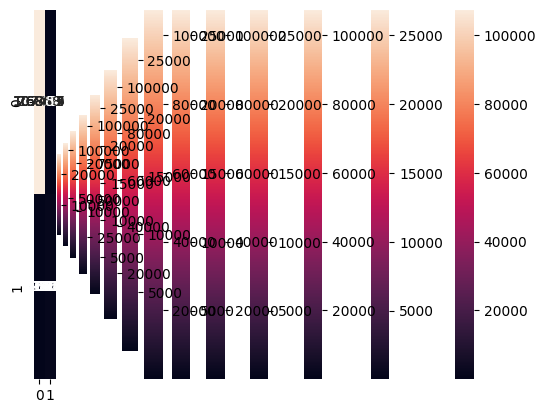

In [56]:
Evaluation(x_train , y_train , x_test , y_test)

## - From Above all models performance of gradient boosting (GB) giving good performance so use this for future predition

In [57]:
gb = GradientBoostingClassifier()
gb.fit(x_train , y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [58]:
gb.score(x_train , y_train)

0.9965000045811458

In [59]:
gb.score(x_test , y_test)

0.9962251704170637

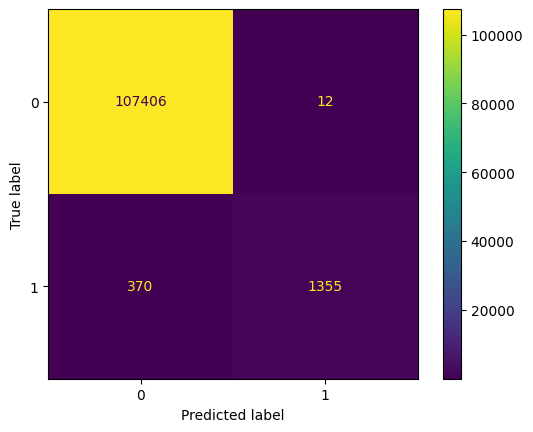

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gb ,x_train , y_train)

## Use Unseen Data For Predition Of Target

In [61]:
path = r"D:\ML\test.csv"

In [66]:
sample = pd.read_csv(path)

In [72]:
sample.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [68]:
sample.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [73]:

sample  =  sample.drop(['id',   'Product ID'] , axis  = 1)


In [74]:
sample.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [75]:
sample.columns  =  x.columns

In [76]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [77]:
sample_scaled  = pre.transform(sample)

In [78]:

sample_scaled  = pd.DataFrame(sample_scaled  ,  columns  =  x.columns)

In [79]:
sample_scaled.shape

(90954, 11)

In [80]:
sample_scaled.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0


In [81]:
x_train.shape

(109143, 11)

In [82]:
x_train.columns

Index(['Type', 'Air temperature ', 'Process temperature ', 'Rotational speed ',
       'Torque ', 'Tool wear ', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [83]:
sample_scaled.columns

Index(['Type', 'Air temperature ', 'Process temperature ', 'Rotational speed ',
       'Torque ', 'Tool wear ', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [84]:
sample_scaled.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0


In [85]:

pred  = gb.predict(sample_scaled)

In [86]:

pred

array([0, 0, 0, ..., 0, 0, 0], shape=(90954,))

In [87]:

np.unique(pred)

array([0, 1])